In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("S2_DataFile(2).csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BRANCH_ID   500 non-null    object
 1   CHANNEL_ID  500 non-null    object
 2   AMOUNT      500 non-null    int64 
 3   TRAN_TYPE   500 non-null    object
 4   TRAN_TIME   500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [7]:
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


In [8]:
df['TRAN_TIME'].dtypes

dtype('O')

In [9]:
print(df['TRAN_TIME'].dtypes)

object


In [10]:
df['TRAN_TIME']=pd.to_datetime(df['TRAN_TIME'],format='%d/%m/%Y %H:%M')

In [11]:
print(df['TRAN_TIME'].dtypes)

datetime64[ns]


In [12]:
print(df['AMOUNT'].dtypes)

int64


In [13]:
print(df['BRANCH_ID'].dtypes)

object


In [14]:
print(df['AMOUNT'].describe())

count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [15]:
mask=df['AMOUNT']>0

In [16]:
df=df[mask]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   BRANCH_ID   498 non-null    object        
 1   CHANNEL_ID  498 non-null    object        
 2   AMOUNT      498 non-null    int64         
 3   TRAN_TYPE   498 non-null    object        
 4   TRAN_TIME   498 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 23.3+ KB


In [18]:
print(df['AMOUNT'].describe())

count    4.980000e+02
mean     3.547383e+06
std      1.605310e+07
min      1.000000e+01
25%      8.418000e+04
50%      1.006600e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [19]:
print(df['TRAN_TIME'].dtypes)

datetime64[ns]


In [20]:
df['TRAN_HOUR']=df['TRAN_TIME'].dt.strftime('%H')

In [21]:
print(df[['TRAN_HOUR','TRAN_TIME']])

    TRAN_HOUR           TRAN_TIME
0          01 2019-01-12 01:11:00
1          11 2019-01-12 11:01:00
2          01 2019-01-12 01:11:00
3          06 2019-01-12 06:50:00
4          01 2019-01-12 01:11:00
..        ...                 ...
495        08 2019-01-12 08:45:00
496        21 2019-04-11 21:13:00
497        10 2019-01-12 10:53:00
498        08 2019-01-12 08:58:00
499        09 2019-01-12 09:13:00

[498 rows x 2 columns]


In [22]:
SUM_BYCHANNEL=df.groupby(df['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_BYCHANNEL')
print(SUM_BYCHANNEL)

  CHANNEL_ID  SUM_BYCHANNEL
0        ATM      179502250
1   INTERNET      768629241
2     MOBILE      818465352


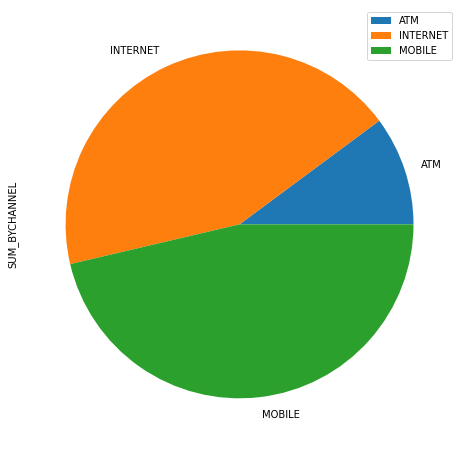

In [23]:
SUM_BYCHANNEL = SUM_BYCHANNEL.set_index('CHANNEL_ID')
plot = SUM_BYCHANNEL.plot.pie(y='SUM_BYCHANNEL',subplots=True, figsize=(8, 8))

In [48]:
count_bychannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
print(count_bychannel)

  CHANNEL_ID  COUNTS
0        ATM      98
1   INTERNET      72
2     MOBILE     328


In [49]:
doanhso = SUM_BYCHANNEL.merge(count_bychannel, on=['CHANNEL_ID'])
print(doanhso)



  CHANNEL_ID  SUM_BYCHANNEL  COUNTS
0        ATM      179502250      98
1   INTERNET      768629241      72
2     MOBILE      818465352     328


In [26]:
doanhso = doanhso.set_index('CHANNEL_ID')
print(doanhso)

            SUM_BYCHANNEL  COUNTS
CHANNEL_ID                       
ATM             179502250      98
INTERNET        768629241      72
MOBILE          818465352     328


In [37]:
ds_max=doanhso['SUM_BYCHANNEL'].sum()
doanhso['%DOANHSO'] =doanhso['SUM_BYCHANNEL']*100/ds_max

In [38]:
gd_max=doanhso['COUNTS'].sum()
doanhso['%SOLUONG']=doanhso['COUNTS']*100/gd_max

In [39]:
print(doanhso)

            SUM_BYCHANNEL  COUNTS   %DOANHSO   %SOLUONG
CHANNEL_ID                                             
ATM             179502250      98  10.160906  19.678715
INTERNET        768629241      72  43.509035  14.457831
MOBILE          818465352     328  46.330059  65.863454


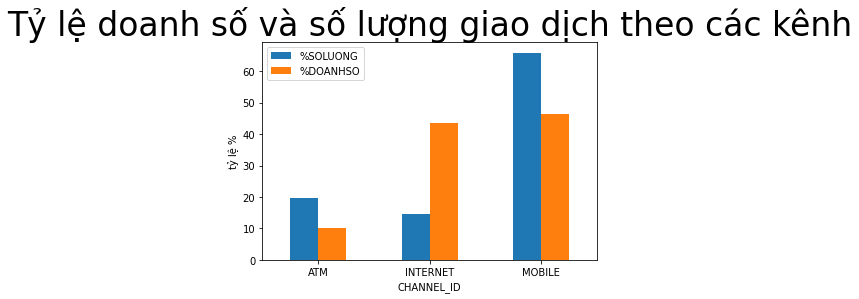

In [40]:
doanhso.plot.bar( y=['%SOLUONG','%DOANHSO'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize=33)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)
plt.show()

In [44]:
# 9. VE BIEU DO LUU LUONG GIAO DICH CÁC KENH TRUNG BINH THEO GIO MOI NGAY
# Tính số ngày trong dữ liệu
number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
print(number_of_days)

89


In [45]:
# Trích ra 2 cột kênh và giờ
df = df[['CHANNEL_ID', 'TRAN_HOUR']]

In [46]:
df

,CHANNEL_ID,TRAN_HOUR
0,MOBILE,01
1,ATM,11
2,MOBILE,01
3,INTERNET,06
4,MOBILE,01
...,...,...
495,ATM,08
496,MOBILE,21
497,MOBILE,10
498,INTERNET,08


In [60]:
# Group và tính số lượng từng kênh trong từng giờ
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')

In [61]:
# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['TRAN_HOUR'], columns=['CHANNEL_ID'])

In [62]:
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,NaN,1.0,1.0
01,NaN,3.0,194.0
02,NaN,NaN,1.0
04,NaN,NaN,1.0
06,17.0,3.0,4.0
07,9.0,3.0,4.0
08,19.0,7.0,19.0
09,6.0,9.0,18.0
10,19.0,6.0,18.0


In [63]:
# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)

In [64]:
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,0.0,1.0,1.0
01,0.0,3.0,194.0
02,0.0,0.0,1.0
04,0.0,0.0,1.0
06,17.0,3.0,4.0
07,9.0,3.0,4.0
08,19.0,7.0,19.0
09,6.0,9.0,18.0
10,19.0,6.0,18.0


In [66]:
#Tính giá trị trung bình theo ngày
df_plot3['ATM']  = df_plot3['ATM'] / number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET'] / number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE'] / number_of_days

In [67]:
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
00,0.000000,0.000126,0.000126
01,0.000000,0.000379,0.024492
02,0.000000,0.000000,0.000126
04,0.000000,0.000000,0.000126
06,0.002146,0.000379,0.000505
07,0.001136,0.000379,0.000505
08,0.002399,0.000884,0.002399
09,0.000757,0.001136,0.002272
10,0.002399,0.000757,0.002272


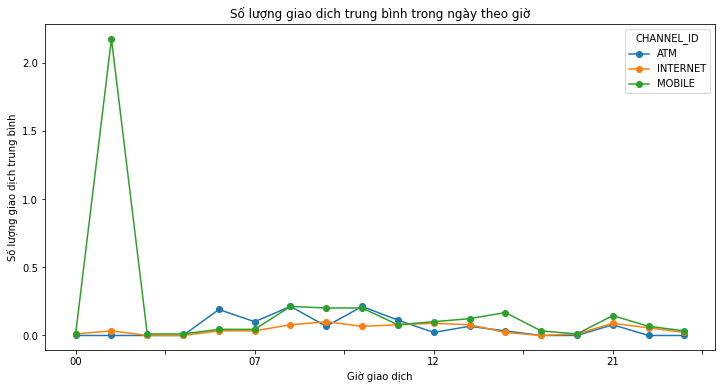

In [36]:
# Vẽ biểu đồ
df_plot3.plot(y=['ATM', 'INTERNET', 'MOBILE'], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
 
plt.show()